# **Introduction** 

DBSCAN stands for Density-Based Spatial Clustering for Applications with Noise. This is an unsupervised clustering algorithm which is used to find high-density base samples to extend the clusters. In this article, I will introduce you to DBSCAN clustering in Machine Learning using Python.

**DBSCAN Clustering in Machine Learning**

The DBSCAN Clustering algorithm is based on the concept of core samples, non-core samples, and outliers:

- Core Samples: The samples present in the high-density area have minimum sample points with the eps radius.
- Non-core samples: The samples close to core samples but are not core samples but are very near to the core samples. The no-core samples lie within the eps radius of the core samples but they don’t have minimum samples points.
- Outliers: The samples that are not part of the core samples and the non-core samples and are far away from all the samples.
The DBSCAN clustering algorithm works well if all the clusters are dense enough and are well represented by the low-density regions.


**DBSCAN Clustering using Python**

Now in this section, I will walk you through how to implement the DBSCAN algorithm using Python. The dataset I’m using here is a credit card dataset. Now let’s import the necessary Python libraries and the dataset:




# **Import library**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# **Data Reading**

In [2]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/hussain0048/Machine-Learning/archive/refs/heads/master.zip" \
    -O "/tmp/Machine-Learning.zip"


zip_ref = zipfile.ZipFile('/tmp/Machine-Learning.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
data = pd.read_csv("/tmp/Machine-Learning-master/Datasets/CC GENERAL.csv")

In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **Preprocessing**

Before moving forward let’s have a look at the null values in the dataset:



In [ ]:
data.isnull().sum()

So we have some null values in the Maximum Payments column. I will fill these values with the average values and here I will also remove the customer id column as it is useless:

In [7]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

Now let’s scale and normalize the dataset:



In [8]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

Now I will implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization:


In [17]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.489825 -0.679678
1 -0.518791  0.545011
2  0.330885  0.268978
3 -0.482374 -0.092110
4 -0.563289 -0.481915


# **Model Training**

Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it:



In [ ]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

In [ ]:
# OTHER OPTION OF 
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True

In [12]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 43


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


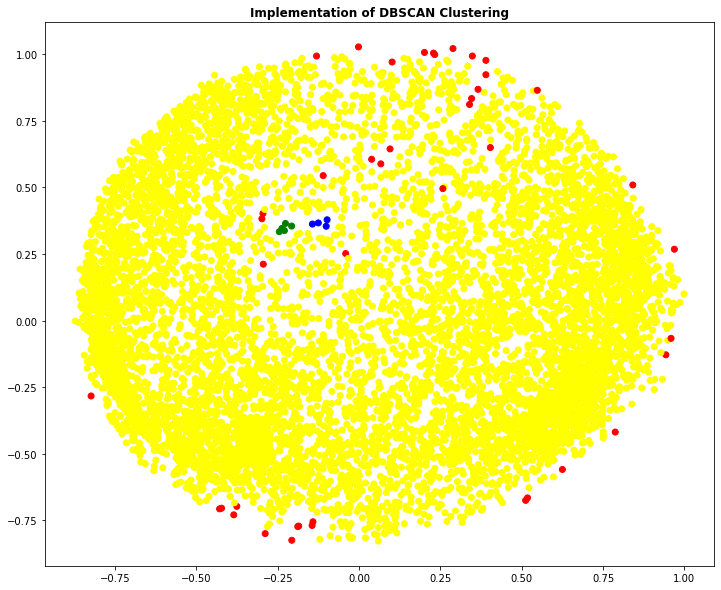

In [ ]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

DBSCAN clustering algorithm is a very simple and powerful clustering algorithm in machine learning. It can identify any cluster of any shape. It is robust to outliers and has only two hyperparameters. It may be difficult for it to capture the clusters properly if the cluster density increases significantly.

# **Measuring Performance of Clusters**

**Completeness_score** Not calcualted


In [ ]:
from sklearn.metrics.cluster import completeness_score
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])


**silhoutte_score**


In [26]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(x_principal, labels))

Silhouette Coefficient: -0.178


In [ ]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

**calinski_harabaz_score**


In [29]:
from sklearn.metrics import calinski_harabasz_score


In [30]:
print("calinski_harabaz_score Coefficient: %0.3f" % calinski_harabasz_score(x_principal, labels))

calinski_harabaz_score Coefficient: 2.878


In [ ]:
rom sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabaz_score(X,labels))

# **References**

[DBSCAN Clustering in Machine Learning](https://thecleverprogrammer.com/2021/02/03/dbscan-clustering-in-machine-learning/)